<a href="https://colab.research.google.com/github/poltorashka22/Data-analysis/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== АНАЛИЗ ПОГОДНЫХ ДАННЫХ ПЕРМЬ ===

1. Загрузка данных...
✓ Загружено 1832 записей

2. Точечная диаграмма температуры и влажности...


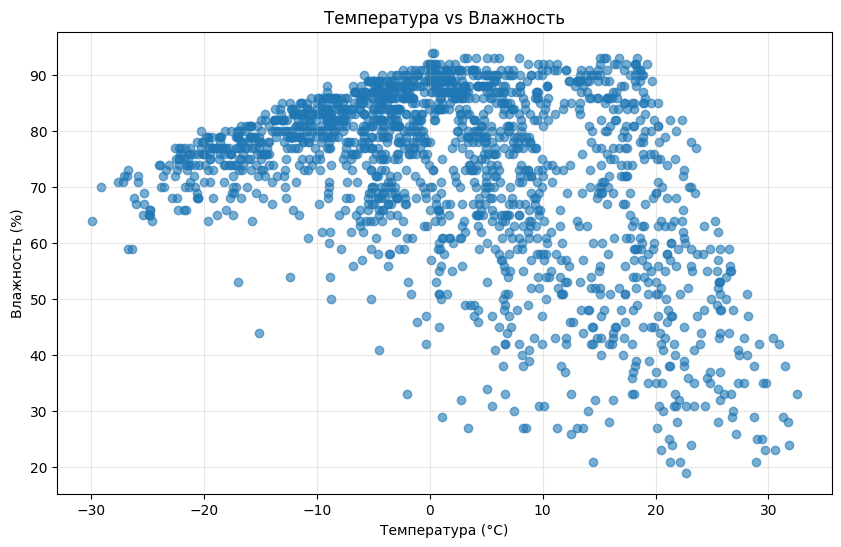

3. Точечная диаграмма с цветами по облачности...


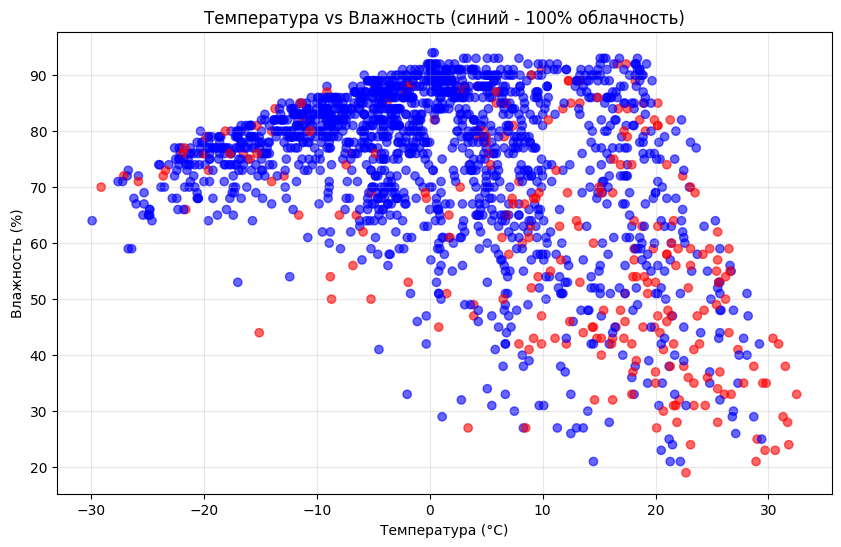

4. Линейная диаграмма температуры...


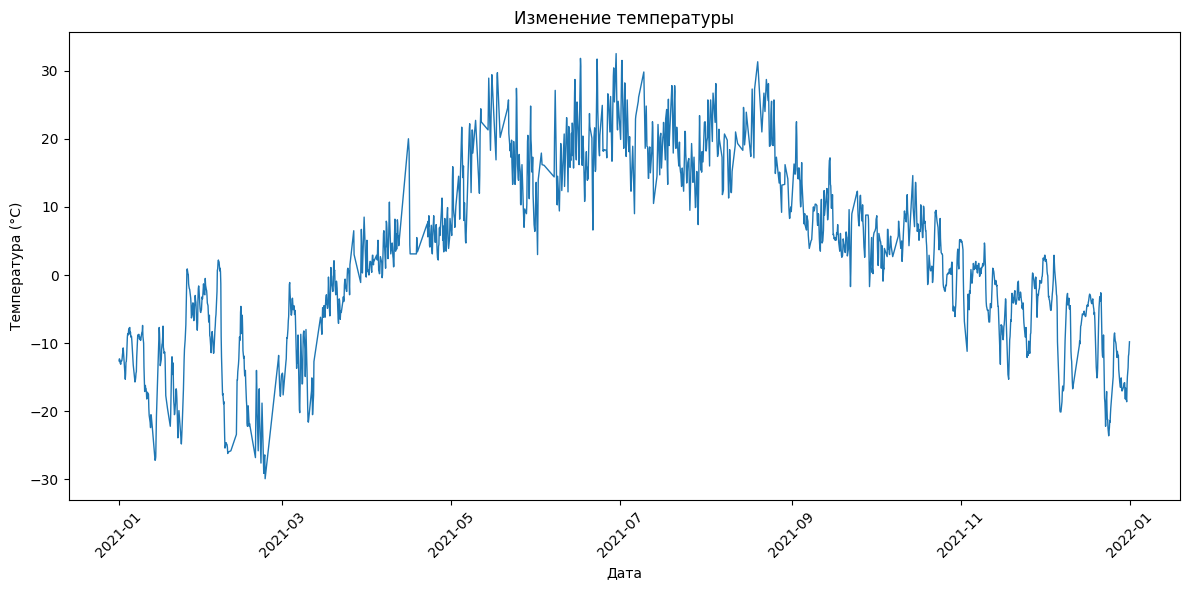

5. Среднемесячная температура...


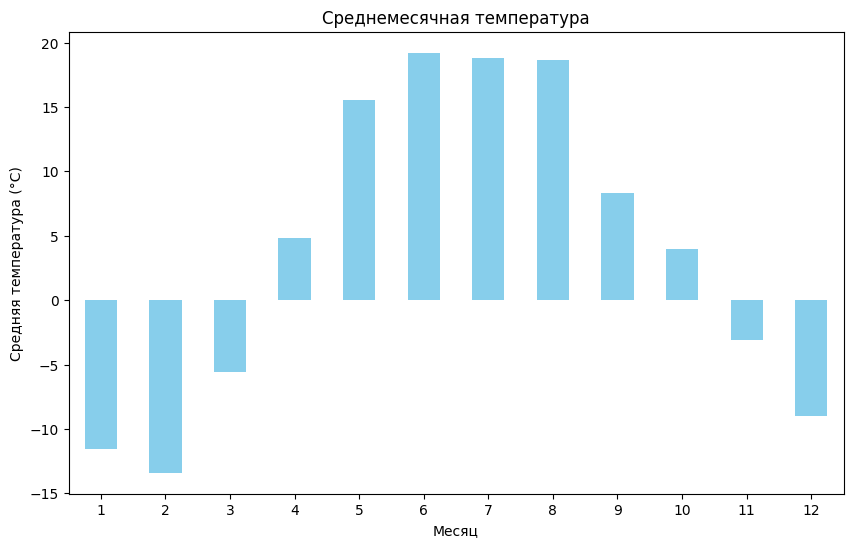

6. Ленточная диаграмма облачности...


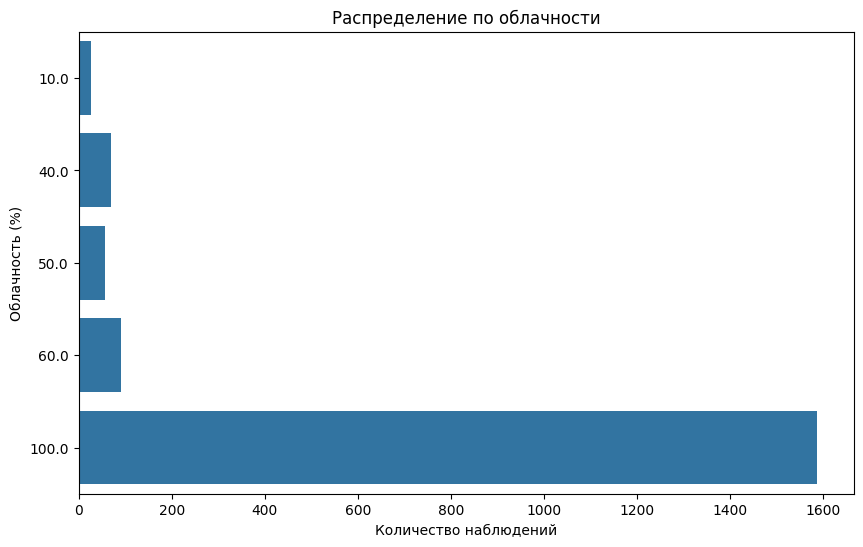

7. Гистограмма температуры...


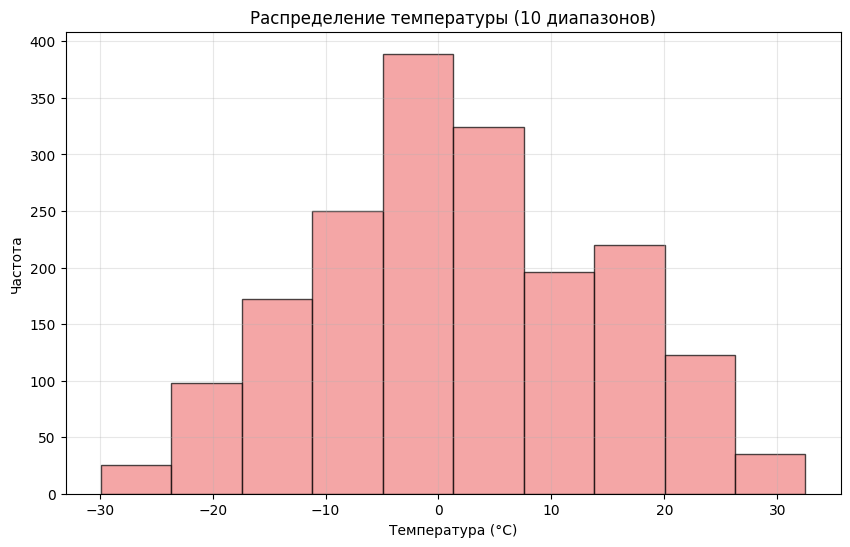

8. Boxplot давления по группам видимости...


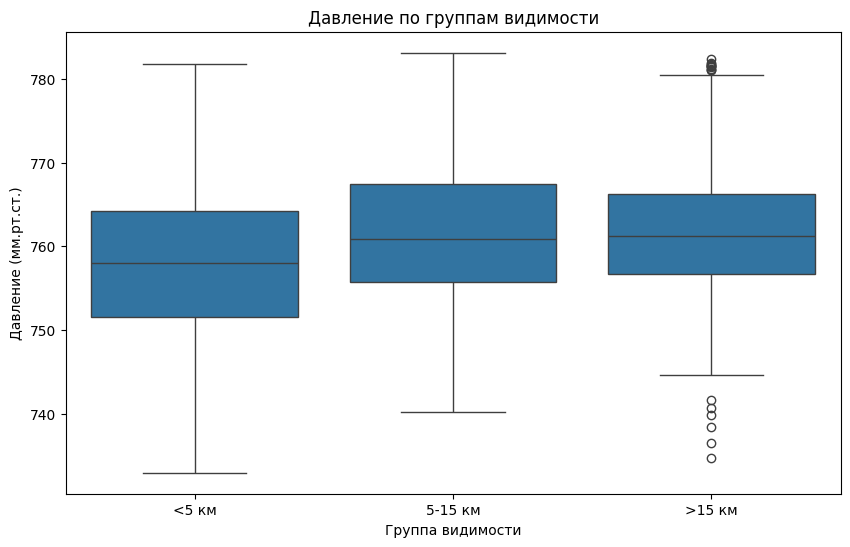

9. Круговая диаграмма высоты облаков...


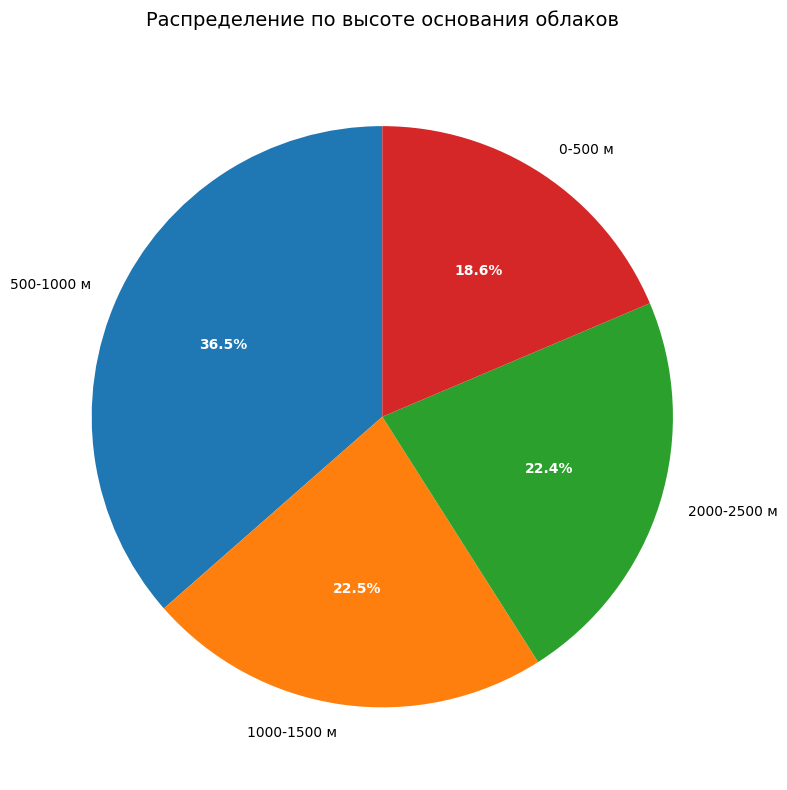


✓ Все графики построены успешно!
Период данных: 2021-01-01 - 2021-12-31
Диапазон температур: -29.9°C - 32.5°C
Диапазон высот облаков: 100 - 2000 м


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

try:

    print("\n1. Загрузка данных...")
    warnings.filterwarnings('ignore', category=UserWarning, module='pandas')
    df = pd.read_csv('/content/weather1 (1).csv', sep=';', encoding='utf-8',
                     parse_dates=['Местное время в Перми'],
                     dayfirst=True)

    warnings.filterwarnings('default', category=UserWarning, module='pandas')

    columns_to_keep = ['Местное время в Перми', 'T', 'P', 'U', 'Ff', 'N', 'H', 'VV']
    df = df[columns_to_keep]

    for col in ['T', 'P', 'U', 'Ff', 'VV']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    def parse_height(h):
        if pd.isna(h): return np.nan
        if isinstance(h, str):
            if '-' in h:
                try: return float(h.split('-')[0])
                except: return np.nan
            elif h.replace('.', '').isdigit():
                return float(h)
        return np.nan

    df['H_clean'] = df['H'].apply(parse_height)

    def parse_cloudiness(n):
        if pd.isna(n): return np.nan
        if isinstance(n, str):
            if '100%' in n: return 100
            elif '%' in n:
                try: return float(n.split('%')[0])
                except: return np.nan
        return np.nan

    df['N_clean'] = df['N'].apply(parse_cloudiness)
    df_clean = df.dropna(subset=['T', 'U', 'P', 'Ff', 'N_clean', 'VV', 'H_clean']).copy()

    print(f"Загружено {len(df_clean)} записей")

    print("\n2. Точечная диаграмма температуры и влажности...")
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean['T'], df_clean['U'], alpha=0.6)
    plt.xlabel('Температура (°C)')
    plt.ylabel('Влажность (%)')
    plt.title('Температура vs Влажность')
    plt.grid(True, alpha=0.3)
    plt.show()

    print("3. Точечная диаграмма с цветами по облачности...")
    plt.figure(figsize=(10, 6))
    colors = ['red' if n != 100 else 'blue' for n in df_clean['N_clean']]
    plt.scatter(df_clean['T'], df_clean['U'], c=colors, alpha=0.6)
    plt.xlabel('Температура (°C)')
    plt.ylabel('Влажность (%)')
    plt.title('Температура vs Влажность (синий - 100% облачность)')
    plt.grid(True, alpha=0.3)
    plt.show()

    print("4. Линейная диаграмма температуры...")
    plt.figure(figsize=(12, 6))
    plt.plot(df_clean['Местное время в Перми'], df_clean['T'], linewidth=1)
    plt.xlabel('Дата')
    plt.ylabel('Температура (°C)')
    plt.title('Изменение температуры')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("5. Среднемесячная температура...")
    df_clean['month'] = df_clean['Местное время в Перми'].dt.month
    monthly_temp = df_clean.groupby('month')['T'].mean()

    plt.figure(figsize=(10, 6))
    monthly_temp.plot(kind='bar', color='skyblue')
    plt.xlabel('Месяц')
    plt.ylabel('Средняя температура (°C)')
    plt.title('Среднемесячная температура')
    plt.xticks(rotation=0)
    plt.show()

    print("6. Ленточная диаграмма облачности...")
    cloud_counts = df_clean['N_clean'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=cloud_counts.values, y=cloud_counts.index.astype(str), orient='h')
    plt.xlabel('Количество наблюдений')
    plt.ylabel('Облачность (%)')
    plt.title('Распределение по облачности')
    plt.show()



    print("7. Гистограмма температуры...")
    plt.figure(figsize=(10, 6))
    plt.hist(df_clean['T'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
    plt.xlabel('Температура (°C)')
    plt.ylabel('Частота')
    plt.title('Распределение температуры (10 диапазонов)')
    plt.grid(True, alpha=0.3)
    plt.show()

    print("8. Boxplot давления по группам видимости...")
    def visibility_group(vv):
        if vv < 5: return '<5 км'
        elif vv <= 15: return '5-15 км'
        else: return '>15 км'

    df_clean['visibility_group'] = df_clean['VV'].apply(visibility_group)

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_clean, x='visibility_group', y='P')
    plt.xlabel('Группа видимости')
    plt.ylabel('Давление (мм.рт.ст.)')
    plt.title('Давление по группам видимости')
    plt.show()

    print("9. Круговая диаграмма высоты облаков...")
    height_data = df_clean['H_clean'].dropna()

    height_bins = [0, 500, 1000, 1500, 2000, 2500, np.inf]
    height_labels = ['0-500 м', '500-1000 м', '1000-1500 м', '1500-2000 м', '2000-2500 м', '>2500 м']

    height_groups = pd.cut(height_data, bins=height_bins, labels=height_labels, right=False)
    height_counts = height_groups.value_counts()

    total = height_counts.sum()
    min_percentage = 1.0

    main_segments = height_counts[height_counts / total * 100 >= min_percentage]
    other_segments = height_counts[height_counts / total * 100 < min_percentage]

    if len(other_segments) > 0:
        other_total = other_segments.sum()
        if other_total > 0:
            main_segments = main_segments.copy()
            main_segments['Другие'] = other_total

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(main_segments.values,
                                      labels=main_segments.index,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10})

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    plt.title('Распределение по высоте основания облаков', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    print("\n✓ Все графики построены успешно!")
    print(f"Период данных: {df_clean['Местное время в Перми'].min().date()} - {df_clean['Местное время в Перми'].max().date()}")
    print(f"Диапазон температур: {df_clean['T'].min():.1f}°C - {df_clean['T'].max():.1f}°C")
    print(f"Диапазон высот облаков: {df_clean['H_clean'].min():.0f} - {df_clean['H_clean'].max():.0f} м")

except FileNotFoundError:
    print("❌ Ошибка: Файл 'weather1.csv' не найден")
except Exception as e:
    print(f"❌ Ошибка: {str(e)}")